In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import networkx as nx
import pandas as pd
import matplotlib.colors as mcolors

In [3]:
grafo = nx.read_edgelist('14313005.edges')

In [36]:
metricas_df = pd.DataFrame(columns = ['degree', 'eigenvector'], index=list(grafo.nodes))

In [40]:
metricas_df['degree'] = [i[1] for i in nx.degree(grafo)]
metricas_df['eigenvector'] = nx.eigenvector_centrality(grafo)

In [41]:
metricas_df

,degree,eigenvector
15234657,69,0.133187
61559439,8,0.015866
157652825,77,0.158532
260631492,39,0.096984
100314530,33,0.081518
...,...,...
355069062,3,0.006670
661473,1,0.003466
82995948,5,0.016353
19980698,3,0.005829


In [77]:
from  matplotlib import colormaps

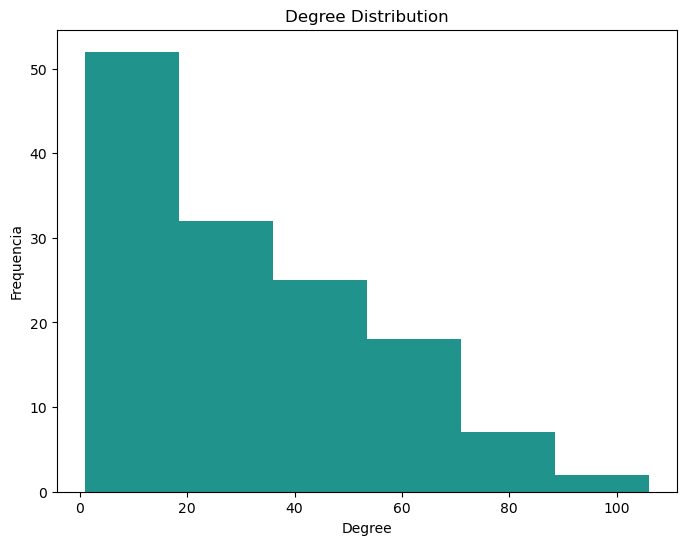

In [91]:
fig = plt.figure(figsize=(8, 6))
plt.hist(metricas_df['degree'], bins = 6, color=colormaps['viridis'].colors[131])
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequencia')
plt.savefig('histograma.png', dpi = 300)
plt.show()

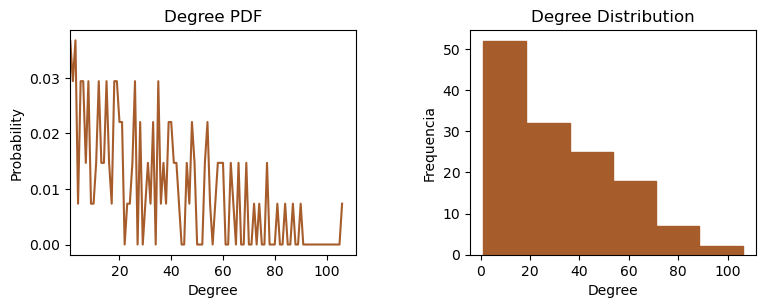

In [44]:
# Calculate the frequency counts
degree_counts = nx.degree_histogram(grafo)

# Normalize the frequency counts to get probabilities
total_nodes = grafo.order()
degree_probs = [count / total_nodes for count in degree_counts]


# Plot the PDF
fig = plt.figure(figsize=(14,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(231)
plt.plot(degree_probs, '-', color='#a65c2b')
plt.title('Degree PDF')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xlim(left=1)

#plot the histogram
plt.subplot(232)
plt.hist(metricas_df['degree'], bins=6, color='#a65c2b', edgecolor='#a65c2b')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequencia')
plt.show()
     

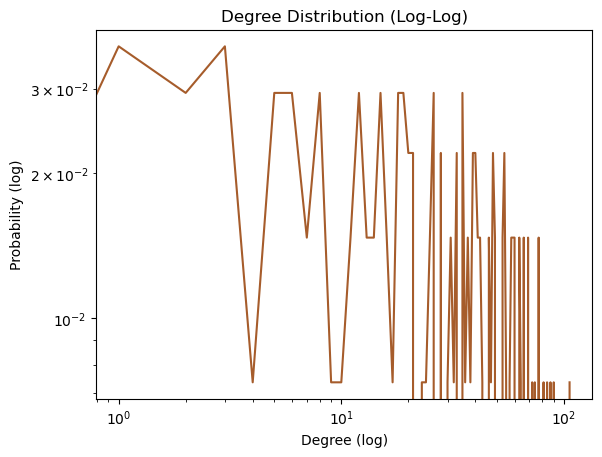

In [45]:
# Plot the degree distribution on a log-log scale
plt.loglog(range(len(degree_probs)), degree_probs, '-', color='#a65c2b')
plt.title('Degree Distribution (Log-Log)')
plt.xlabel('Degree (log)')
plt.ylabel('Probability (log)')
plt.show()

In [46]:
pos = nx.spring_layout(metricas_df, seed=675)

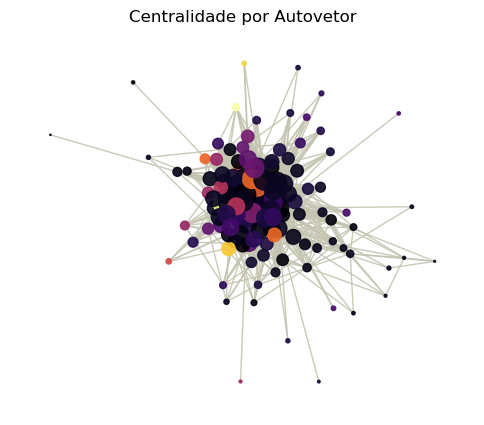

In [74]:

pos = nx.spring_layout(grafo)

plt.figure(figsize=(6, 5))
nx.draw_networkx(grafo,
                 pos = pos,
                 cmap = 'inferno',
                 with_labels = False,
                 alpha = 0.9 ,
                 edge_color = '#c4c4b1',
                 node_color = [float(el) for el in metricas_df.index],
                 node_size = metricas_df['eigenvector']*1500,
                 )
#plt.colorbar()
plt.title("Centralidade por Autovetor")
plt.axis('off')
plt.savefig('centralidade_autovetor.png')

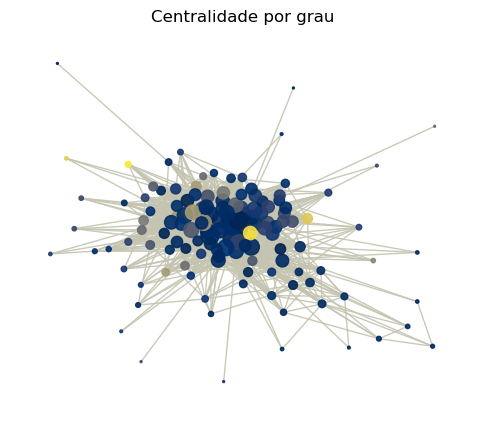

In [75]:

pos = nx.spring_layout(grafo)

plt.figure(figsize=(6, 5))
nx.draw_networkx(grafo,
                 pos = pos,
                 cmap = 'cividis',
                 with_labels = False,
                 alpha = 0.9 ,
                 edge_color = '#c4c4b1',
                 node_color = [float(el) for el in metricas_df.index],
                 node_size = metricas_df['degree']*2,
                 )
#plt.colorbar()
plt.title("Centralidade por grau")
plt.axis('off')
plt.savefig('centralidade_grau.png')